# QUESTIONS TO EXPLORE

* How does customer age and gender influence their purchasing behavior?
* Are there discernible patterns in sales across different time periods?
* Which product categories hold the highest appeal among customers?
* What are the relationships between age, spending, and product preferences?
* How do customers adapt their shopping habits during seasonal trends?
* Are there distinct purchasing behaviors based on the number of items bought per transaction?
* What insights can be gleaned from the distribution of product prices within each category?

# IMPORTING LIBRARIES

In [14]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns

# READ DATASET

In [6]:
dataset = pd.read_csv('retail_sales_dataset.csv')
dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
len(dataset)

1000

# DATA CLEANING AND FILTERING

In [8]:
dataset.drop(columns=['Transaction ID','Customer ID'],axis=1,inplace=True)

In [9]:
dataset.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Gender            1000 non-null   object
 2   Age               1000 non-null   int64 
 3   Product Category  1000 non-null   object
 4   Quantity          1000 non-null   int64 
 5   Price per Unit    1000 non-null   int64 
 6   Total Amount      1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [12]:
dataset.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [15]:
dataset['Date'].dt.year.unique()

array([2023, 2024], dtype=int64)

In [16]:
dataset[dataset['Date'].dt.year==2024]

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
210,2024-01-01,Male,42,Beauty,3,500,1500
649,2024-01-01,Male,55,Electronics,1,30,30


In [19]:
dataset.loc[dataset['Date'].dt.year == 2024,'Date'] = dataset.loc[dataset['Date'].dt.year == 2024, 'Date'].apply(lambda x: x.replace(year=2023))

In [20]:
dataset['Date'].dt.year.unique()

array([2023], dtype=int64)

In [22]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
dataset['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [24]:
dataset['Quantity'].unique()

array([3, 2, 1, 4], dtype=int64)

In [25]:
dataset['Price per Unit'].unique()

array([ 50, 500,  30,  25, 300], dtype=int64)

In [26]:
dataset = dataset.reset_index(drop=True)

In [27]:
dataset.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


# EXPLORATORY DATA ANALYSIS (EDA)

In [28]:
dataset['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [30]:
dataset['Age'].max(),dataset['Age'].min()

(64, 18)

In [44]:
dataset['Age'].value_counts(bins=4).sort_index()

(17.953, 29.5]    251
(29.5, 41.0]      236
(41.0, 52.5]      252
(52.5, 64.0]      261
Name: Age, dtype: int64

In [113]:
temp = []
temp_gen = []
frame_1 = dataset[dataset['Age']<=29]
temp.append(len(frame_1))
temp_gen.append((frame_1['Gender'].value_counts().sort_index().index,frame_1['Gender'].sort_index().value_counts().values))
frame_2 = dataset[dataset['Age'].between(30, 41)]
temp.append(len(frame_2))
temp_gen.append((frame_2['Gender'].value_counts().sort_index().index,frame_2['Gender'].value_counts().sort_index().values))
frame_3 = dataset[dataset['Age'].between(42, 52)]
temp.append(len(frame_3))
temp_gen.append((frame_3['Gender'].value_counts().sort_index().index,frame_3['Gender'].value_counts().sort_index().values))
frame_4 = dataset[dataset['Age']>=53]
temp.append(len(frame_4))
temp_gen.append((frame_4['Gender'].value_counts().sort_index().index,frame_4['Gender'].value_counts().sort_index().values))

In [114]:
temp

[251, 236, 252, 261]

In [115]:
sum(temp)

1000

In [116]:
temp_gen

[(Index(['Female', 'Male'], dtype='object'), array([129, 122], dtype=int64)),
 (Index(['Female', 'Male'], dtype='object'), array([115, 121], dtype=int64)),
 (Index(['Female', 'Male'], dtype='object'), array([138, 114], dtype=int64)),
 (Index(['Female', 'Male'], dtype='object'), array([128, 133], dtype=int64))]

In [120]:
temp_gen[0]

(Index(['Female', 'Male'], dtype='object'), array([129, 122], dtype=int64))

In [ ]:
frame_1['']

In [138]:
spent = [frame_1['Total Amount'].sum(),frame_2['Total Amount'].sum(),frame_3['Total Amount'].sum(),frame_4['Total Amount'].sum()]

In [139]:
spent

[123155, 111390, 111250, 110205]

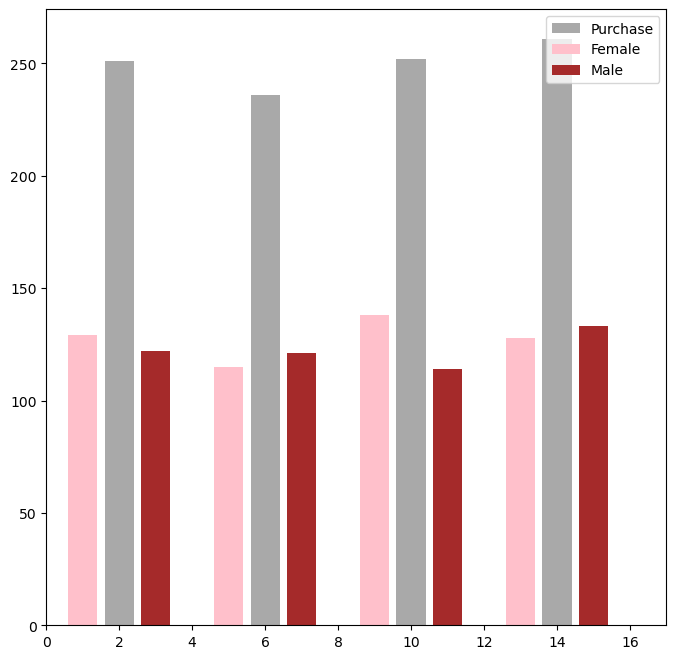

In [141]:
pyp.figure(figsize=(8,8))
pyp.xlim(0,17)
a,b,c = 2,1,3
for i in range(4):
    pyp.bar(a,temp[i],color='darkgray')
    pyp.bar(b,temp_gen[i][1][0],color='pink')
    pyp.bar(c,temp_gen[i][1][1],color='brown')
    a += 4
    b += 4
    c += 4
legend_labels = ['Purchase' ,'Female','Male']
pyp.legend(legend_labels)
pyp.show()